In [ ]:
### colab : matplotlib 한글 인식 (방법1)

# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [1]:
### 폰트 설치 후에 '런타임' > '세션 다시 시작' 하여 --> 여기서부터 ("이후 셀 실행")

### 설치한 나눔폰트로 설정 변경하기

## 필요한 함수 / 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import os
import folium
import json
from folium import plugins
from folium.plugins import MarkerCluster
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

# 폰트 지정 : 나눔바른고딕 폰트로 바꾸기
plt.rc('font', family='NanumBarunGothic')

# # 폰트 지정 : Malgun Gothic 폰트로 바꾸기
# plt.rc('font', family='Malgun Gothic')

# 설정된 font.family 확인하기
plt.rcParams['font.family']

['NanumBarunGothic']

# 대여소별 전체_건수,전체_이용_분,전체_이용_거리

## 데이터 불러오기

In [4]:
# 데이터 불러오기 -> DataFrame 생성
filepath = '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/data/groupby_lat_dong_23년12월렌탈.csv'
df = pd.read_csv(filepath, encoding='utf-8')
df.head(2)

,Unnamed: 0,기준_날짜,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,시작_대여소명,종료_대여소명,시작_대여소_lat,시작_대여소_lon,종료_대여소_lat,종료_대여소_lon,시작_대여소_동명,종료_대여소_동명
0,0,20231201,ST-10,ST-10,2,218,2780,서교동_037_1,서교동_037_1,37.552746,126.918617,37.552746,126.918617,서교동,서교동
1,1,20231201,ST-10,ST-11,2,22,1954,서교동_037_1,서강동_046_1,37.552746,126.918617,37.547691,126.919983,서교동,서강동


In [ ]:
# 기본정보 확인
df.shape
print('-'*80)
df.info()

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131098 entries, 0 to 1131097
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1131098 non-null  int64  
 1   기준_날짜       1131098 non-null  int64  
 2   시작_대여소_ID   1131098 non-null  object 
 3   종료_대여소_ID   1131098 non-null  object 
 4   전체_건수       1131098 non-null  int64  
 5   전체_이용_분     1131098 non-null  int64  
 6   전체_이용_거리    1131098 non-null  int64  
 7   시작_대여소명     1131098 non-null  object 
 8   종료_대여소명     1131098 non-null  object 
 9   시작_대여소_lat  1131098 non-null  float64
 10  시작_대여소_lon  1131098 non-null  float64
 11  종료_대여소_lat  1131098 non-null  float64
 12  종료_대여소_lon  1131098 non-null  float64
 13  시작_대여소_동명   1130031 non-null  object 
 14  종료_대여소_동명   1124511 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 129.4+ MB


## 데이터 전처리

In [ ]:
### 누락데이터 확인
df.isnull().sum()


Unnamed: 0       0
기준_날짜            0
시작_대여소_ID        0
종료_대여소_ID        0
전체_건수            0
전체_이용_분          0
전체_이용_거리         0
시작_대여소명          0
종료_대여소명          0
시작_대여소_lat       0
시작_대여소_lon       0
종료_대여소_lat       0
종료_대여소_lon       0
시작_대여소_동명     1067
종료_대여소_동명     6587
dtype: int64

## 데이터 탐색

### [1] '시작_대여소명' 기준 이용 현황

In [5]:
# 우선은 대여현황에 필요한 컬럼만 df_rent DataFrame 구성
df_rent = df.loc[:,('기준_날짜','시작_대여소_ID','시작_대여소명','전체_건수','전체_이용_분','전체_이용_거리','시작_대여소_lat','시작_대여소_lon')]
df_rent.head(2)

,기준_날짜,시작_대여소_ID,시작_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작_대여소_lat,시작_대여소_lon
0,20231201,ST-10,서교동_037_1,2,218,2780,37.552746,126.918617
1,20231201,ST-10,서교동_037_1,2,22,1954,37.552746,126.918617


In [6]:
### '시작_대여소_ID', '시작_대여소명' 별로 그룹핑해서 이용현황 파악하기

# df_rent_per_startname = df_rent.groupby(['시작_대여소_ID'],['시작_대여소명']).agg({'전체_건수':sum,'전체_이용_분':sum,'전체_이용_거리':sum})
# df_rent_per_startname = df_rent.groupby(['시작_대여소_ID']).agg({'전체_건수':sum,'전체_이용_분':sum,'전체_이용_거리':sum})
df_rent_per_startname = df_rent.groupby(['시작_대여소명']).agg({'전체_건수':sum,'전체_이용_분':sum,'전체_이용_거리':sum})
df_rent_per_startname.head(10)


,전체_건수,전체_이용_분,전체_이용_거리
시작_대여소명,,,
_39,702,12250,1556660
_67,164,3078,382164
_68,276,9210,550040
_69,114,2240,255488
no_data,1327,27696,3014740
가락1동_001_1,1381,18118,1762307
가락1동_001_2,3252,61408,6215996
가락1동_001_3,586,10448,1329354
가락1동_001_4,1271,21616,3014212


#### 상위 top N

In [ ]:
### ['전체_건수','전체_이용_분','전체_이용_거리'] 상위 top N

# 표시 건수
top = 5

df_rent_per_startname_totalcount_topN = df_rent_per_startname.sort_values(by='전체_건수', ascending=False).head(top)
print(f'전체_건수별 top {top} : \n{df_rent_per_startname_totalcount_topN}')
print('-'*80)

df_rent_per_startname_usetime_topN = df_rent_per_startname.sort_values(by='전체_이용_분', ascending=False).head(top)
print(f'전체_이용_분별 top {top} : \n{df_rent_per_startname_usetime_topN}')
print('-'*80)

df_rent_per_startname_distance_topN = df_rent_per_startname.sort_values(by='전체_이용_거리', ascending=False).head(top)
print(f'전체_이용_거리별 top {top} : \n{df_rent_per_startname_distance_topN}')
print('-'*80)

전체_건수별 top 5 : 
             전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                              
가양1동_039_8   18167   194875  23808185
방화1동_064_1   11894    99650  12398851
가양1동_039_16  10447    98387  12871124
가양1동_040_1    9497   122050  14024856
잠실6동_031_5    9092   172242  17844048
--------------------------------------------------------------------------------
전체_이용_분별 top 5 : 
            전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                             
가양1동_039_8  18167   194875  23808185
망원1동_041_1   4691   179751  23603021
잠실6동_031_5   9092   172242  17844048
구로3동_037_1   7992   156908  20176529
자양3동_050_1   6816   156546  17208053
--------------------------------------------------------------------------------
전체_이용_거리별 top 5 : 
            전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                             
가양1동_039_8  18167   194875  23808185
망원1동_041_1   4691   179751  23603021
구로3동_037_1   7992   156908  20176529
마장동_032_1    3010   119556  19217912
잠실6동_031_5   9092   172242  17844048
-

#### 하위 bottom N

In [ ]:
### ['전체_건수','전체_이용_분','전체_이용_거리'] bottom N

# 표시 건수
bottom = 5

df_rent_per_startname_totalcount_bottomN = df_rent_per_startname.sort_values(by='전체_건수', ascending=False).tail(bottom)
print(f'전체_건수별 bottom {bottom} : \n{df_rent_per_startname_totalcount_bottomN}')
print('-'*80)

df_rent_per_startname_usetime_bottomN = df_rent_per_startname.sort_values(by='전체_이용_분', ascending=False).tail(bottom)
print(f'전체_이용_분별 bottom {bottom} : \n{df_rent_per_startname_usetime_bottomN}')
print('-'*80)

df_rent_per_startname_distance_bottomN = df_rent_per_startname.sort_values(by='전체_이용_거리', ascending=False).tail(bottom)
print(f'전체_이용_거리별 bottom {bottom} : \n{df_rent_per_startname_distance_bottomN}')
print('-'*80)


전체_건수별 bottom 5 : 
            전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                             
방배2동_005_2     22      164     13744
가양2동_030_1     16      470     31844
신당5동_002_1     16      346     28454
방배3동_045_2     16      190     44520
방화2동_002_1      4      246     12866
--------------------------------------------------------------------------------
전체_이용_분별 bottom 5 : 
            전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                             
흑석동_047_1      26      284     38514
창3동_015_1      22      256     38770
방화2동_002_1      4      246     12866
방배3동_045_2     16      190     44520
방배2동_005_2     22      164     13744
--------------------------------------------------------------------------------
전체_이용_거리별 bottom 5 : 
            전체_건수  전체_이용_분  전체_이용_거리
시작_대여소명                             
가양2동_030_1     16      470     31844
신당5동_002_1     16      346     28454
영등포동_029_3     24      478     26906
방배2동_005_2     22      164     13744
방화2동_002_1      4      246     12866

#### 상위 Ton N & 하위 bottom N 시각화

In [ ]:
### 상위 top N & 하위 bottom n 시각화 -> 사용자함수 정의

def topN_per_category(x, y, category, number) :

    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    plt.xticks(rotation=30)

    title_top = '[' + y + ']' + ' 상위 Top ' + str(number) + ' 대여소'
    title_bottom = '[' + y + ']' + ' 하위 bottom ' + str(number) + ' 대여소'
    df_name = 'df_rent_per_startname'
    df_topN = df_name + '_' + category + '_' + 'topN'
    df_bottomN = df_name + '_' + category + '_' + 'bottomN'

    df_topN = df_rent_per_startname.sort_values(by=y, ascending=False).head(number)
    sns.barplot(data=df_topN, x=x, y=y, ax=ax[0])
    plt.xticks(rotation=30)
    ax[0].set_title(title_top, size=16)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='{:,.0f}')

    df_bottomN = df_rent_per_startname.sort_values(by=y, ascending=False).tail(number)
    sns.barplot(data=df_bottomN, x=x, y=y, ax=ax[1], color='c')
    ax[1].set_title(title_bottom, size=16)
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='{:,.0f}')

    plt.show()

In [ ]:
### 전체건수 top N 시각화

# 표시 건수
top = 10

df_rent_per_startname_totalcount_topN = df_rent_per_startname.sort_values(by='전체_건수', ascending=False).head(top)
ax = sns.barplot(data=df_rent_per_startname_totalcount_topN, x='시작_대여소명', y='전체_건수')
plt.xticks(rotation=30)
ax.set_title('[전체 건수] Top 10 대여소', size=14)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

In [ ]:
### [전체건수] top N & bottom N 시각화

topN_per_category('시작_대여소명', '전체_건수', 'totalcount', 10)


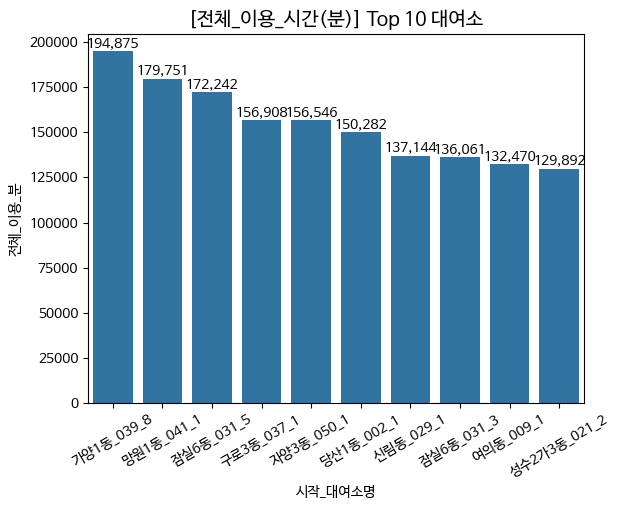

In [ ]:
### [전체_이용_분] top N 시각화

# 표시 건수
top = 10

df_rent_per_startname_usetime_topN = df_rent_per_startname.sort_values(by='전체_이용_분', ascending=False).head(top)
ax = sns.barplot(data=df_rent_per_startname_usetime_topN, x='시작_대여소명', y='전체_이용_분')
plt.xticks(rotation=30)
ax.set_title('[전체_이용_시간(분)] Top 10 대여소', size=14)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

In [ ]:
### [전체_이용_분] top N 시각화

# 표시 건수
top = 10

df_rent_per_startname_usetime_topN = df_rent_per_startname.sort_values(by='전체_이용_분', ascending=False).head(top)
df_rent_per_startname_usetime_topN

In [ ]:
### [전체_이용_분] top N & bottom N 시각화

topN_per_category('시작_대여소명', '전체_이용_분', 'usetime', 10)


In [ ]:
### 전체_이용_거리 top N 시각화

# 표시 건수
top = 10

df_rent_per_startname_distance_topN = df_rent_per_startname.sort_values(by='전체_이용_거리', ascending=False).head(top)
ax = sns.barplot(data=df_rent_per_startname_distance_topN, x='시작_대여소명', y='전체_이용_거리')
plt.xticks(rotation=30)
ax.set_title('[전체_이용_거리] Top 10 대여소', size=14)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

In [ ]:
### [전체_이용_거리] top N & bottom N 시각화

topN_per_category('시작_대여소명', '전체_이용_거리', 'distance', 10)


### [2] '시작_대여소ID' 기준 이용 현황

In [7]:
### '시작_대여소_ID', '시작_대여소명' 별로 그룹핑해서 이용현황 파악하기

df_rent_per_startID = df_rent.groupby(['시작_대여소_ID']).agg({'전체_건수':sum,'전체_이용_분':sum,'전체_이용_거리':sum}).reset_index()
df_rent_per_startID.head(3)


,시작_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
0,ST-10,1452,37168,3387334
1,ST-1000,1890,32074,4209856
2,ST-1002,3428,67328,7668136


In [9]:
# # 필요한 '시작_대여소_ID','시작_대여소_lat','시작_대여소_lon' 컬럼만 사용
# df_rent_lat_lon = df_rent.loc[:, ('시작_대여소_ID','시작_대여소명', '시작_대여소_lat','시작_대여소_lon')]

# df_rent_lat_lon.head(2)

In [ ]:
# ### ['전체_건수','전체_이용_분','전체_이용_거리'] 상위 top N

# # 표시 건수
# top = 30

# df_rent_per_startID_totalcount = df_rent_per_startID.sort_values(by='전체_건수', ascending=False).head(top)
# df_rent_per_startID_usetime = df_rent_per_startID.sort_values(by='전체_이용_분', ascending=False).head(top)
# df_rent_per_startID_distance = df_rent_per_startID.sort_values(by='전체_이용_거리', ascending=False).head(top)


In [10]:
### ['전체_건수','전체_이용_분','전체_이용_거리'] 전체 대여소 현황 표시 해 보자

df_rent_per_startID_totalcount = df_rent_per_startID.sort_values(by='전체_건수', ascending=False)
df_rent_per_startID_usetime = df_rent_per_startID.sort_values(by='전체_이용_분', ascending=False)
df_rent_per_startID_distance = df_rent_per_startID.sort_values(by='전체_이용_거리', ascending=False)

#### 경위도 좌표 가져오기

In [19]:
# [전체_이용_시간(분)'] 상위 top N 에 위도, 경도 merge -> pd.merge()
df_usetime_location = pd.merge(df_rent_per_startID_usetime,df_rent_lat_lon,
                                           left_on='시작_대여소_ID', right_on='시작_대여소_ID', how='left' )
print(df_usetime_location.shape)
print('-'*80)

# 시작_대여소_ID 기준으로 중복 제거
df_usetime_location = df_usetime_location.drop_duplicates(['시작_대여소_ID']).reset_index()
# df_usetime_location.reset_index() # 이거 안될 때는 어캐 하라고 했지? ㅠㅠ
print(df_usetime_location.shape)


(1131098, 7)
--------------------------------------------------------------------------------
(2736, 8)


In [57]:
# [전체_이용_시간(분)'] 상위 top N 에 위도, 경도 merge -> pd.merge()
df_distance = pd.merge(df_rent_per_startID_distance,df_rent_lat_lon,
                                           left_on='시작_대여소_ID', right_on='시작_대여소_ID', how='left' )
print(df_distance.shape)
print('-'*80)

# 시작_대여소_ID 기준으로 중복 제거
df_distance = df_distance.drop_duplicates(['시작_대여소_ID']).reset_index()
# df_distance.reset_index() # 이거 안될 때는 어캐 하라고 했지? ㅠㅠ
print(df_distance.shape)

(1131098, 7)
--------------------------------------------------------------------------------
(2736, 8)


In [58]:
df_distance.head(2)

,index,시작_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,시작_대여소명,시작_대여소_lat,시작_대여소_lon
0,0,ST-2031,18167,194875,23808185,가양1동_039_8,37.566925,126.827438
1,2412,ST-2905,4691,179751,23603021,망원1동_041_1,37.555576,126.896889


## 지도 시각화

In [ ]:
# # 서울 지도에서 행정 구역별 표시

# import requests
# import json

# # 서울 행정구역 json raw파일(githubcontent)
# r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
# c = r.content
# seoul_geo = json.loads(c)


In [ ]:
# # 서울 지역의 구별 boundary 시각화

# # 지도 크기 설정
# width=600
# height=600

# map = folium.Map(
#     location=[37.559819, 126.963895],
#     zoom_start=11,
# )

# folium.GeoJson(
#     seoul_geo,
#     name='지역구'
# ).add_to(map)

# map

### [1] 대여소별 이용시간(분) : (1) MarkerCluster 사용

In [24]:
### 대여소별 이용시간(분) 지도 시각화: (1) MarkerCluster 사용 [popup, tooltip 표시]

# 서울시청 위경도
# latitude = 37.5667
# longitude = 126.9784

# 서울역 위경도
latitude = 37.5559
longitude = 126.9723

# 지도 크기 설정
width=750
height=500

# 지도 생성하기
map = folium.Map(
    location=[latitude,longitude],
    zoom_start=12,width=width,height=height)

# 서울 지역의 구별 boundary 시각화
# folium.GeoJson(
#     seoul_geo,
#     name='지역구'
# ).add_to(map)

coords = df_usetime_location[['시작_대여소_lat', '시작_대여소_lon']]

marker_cluster = MarkerCluster().add_to(map)

idx = 0
for lat, long in zip(coords['시작_대여소_lat'], coords['시작_대여소_lon']) :
    folium.Marker([lat, long],
                  popup = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                            df_usetime_location['전체_이용_분'][idx]),
                  tooltip = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                            df_usetime_location['전체_이용_분'][idx]),
                  icon = folium.Icon(color="yellow")).add_to(marker_cluster)
    idx = idx+1
map

Output hidden; open in https://colab.research.google.com to view.

### [2] 대여소별 이용시간(분) : (2) CircleMarker 사용

In [67]:
### 대여소별 이용시간(분) 지도 시각화: (2) CircleMarker 사용 [radius, color, popup, tooltip 표시]

# 서울역 위경도
latitude = 37.5559
longitude = 126.9723

# 지도 크기 설정
width=750
height=500
# 사용 시간 기준으로 radius, color 를 설정하기 위해 나누는 값 정의
# divided_num = 3600*100
divided_num = 3600*3

# 지도 생성하기
map = folium.Map(
    location=[latitude,longitude],
    zoom_start=12,width=width,height=height)

# 대여소 위치(경도, 위도)에, 반지름 설정
for idx in range(len(df_usetime_location)) :
    lat = df_usetime_location['시작_대여소_lat'][idx]
    lon = df_usetime_location['시작_대여소_lon'][idx]
    radius = df_usetime_location['전체_이용_분'][idx]/divided_num

    # 이용시간(분) 기준으로 색상 지정
    if (idx <= 100) : # 100위 이내
        color = 'red'
    elif (idx <= 500) : # 100위 ~ 500위
        color = 'brown'
    elif (idx <= 1500) : # 500위 ~ 1500위
        color = 'yellow'
    else :
        # color = 'blue' # 1500위 이후 색상
        color = '#3186cc' # 1500위 이후 색상

    folium.CircleMarker([lat, lon],
                        radius=radius,
                        color=color,
                        popup = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                                df_usetime_location['전체_이용_분'][idx]),
                        tooltip = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                                  df_usetime_location['전체_이용_분'][idx])
    ).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

### [3] 대여소별 이용거리(m)

In [66]:
### 대여소별 이용거리(m) 지도 시각화 : CircleMarker 사용 [radius, color, popup, tooltip 표시]

# 서울역 위경도
latitude = 37.5559
longitude = 126.9723

# 지도 크기 설정
width=750
height=500

# 이용거리(m) 기준으로 radius, color 를 설정하기 위해 나누는 값 정의
divided_num = 1000*1000

# 지도 생성하기
map = folium.Map(
    location=[latitude,longitude],
    zoom_start=12,width=width,height=height)

# 대여소 위치(경도, 위도)에, 반지름 설정
# for idx in range(len(df_usetime_location)) : # 전체 표시
for idx in range(len(df_usetime_location)-2000) : # 하위 2000개 제외
    lat = df_usetime_location['시작_대여소_lat'][idx]
    lon = df_usetime_location['시작_대여소_lon'][idx]
    radius = df_usetime_location['전체_이용_거리'][idx]/divided_num

    # 이용시간(분) 기준으로 색상 지정
    if (idx <= 100) : # 100위 이내
        color = 'red'
    elif (idx <= 500) : # 100위 ~ 500위
        # color = 'brown'
        color = 'yellow'
    # elif (idx <= 1500) : # 500위 ~ 1500위
    #     color = 'yellow'
    else :
        # color = 'blue' # 1500위 이후 색상
        color = '#3186cc' # 1500위 이후 색상

    folium.CircleMarker([lat, lon],
                        radius=radius,
                        color=color,
                        popup = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                                df_usetime_location['전체_이용_분'][idx]),
                        tooltip = '{} {}분'.format(df_usetime_location['시작_대여소명'][idx],
                                                  df_usetime_location['전체_이용_분'][idx])
    ).add_to(map)
map